In [1]:
!pip install plotly
!pip install cufflinks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

%matplotlib inline

In [3]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
s = pd.read_csv('data/school_report_ver2.csv', encoding='cp949')
s.head()

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
0,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,나쁨,나쁨,No,No
1,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,나쁨,나쁨,No,No
2,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,끔찍함,나쁨,No,Yes
3,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,나쁨,좋음,No,Yes
4,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,좋음,좋음,No,No


In [5]:
s.columns

Index(['성별', '전공', '신장', '몸무게', '1학년평균성적', '2학년평균성적', '3학년평균성적', '취미',
       '일평균학습시간', '집중공부시간', '기대연봉', '전공만족여부', '전공관련취업선호도', '일평균소셜미디어사용시간',
       '통학시간', '학업스트레스', '교우관계스트레스', '아르바이트여부', '방과후수업여부'],
      dtype='object')

In [6]:
# 행과 열의 개수
s.shape

(235, 19)

In [7]:
y = pd.read_csv('data/1급-기밀파일.csv', encoding='cp949')
y.head()

,타임스탬프,학년,성별,학과,취미,개인공부시간,공부 시간대,기대연봉,학과 만족여부,전공 선호도,소셜미디어 사용시간,등교시간,하교시간,하교후 가는 곳,학업 스트레스,친구관계,알바,방과후 여부
0,2023. 10. 12 오후 12:21:46,2학년,남자,창업마케팅과,운동,1시간-2시간,방과후(저녁),3천만원,O,5,1시간-2시간,10-30분,18시 이후!,학원 또는 방과후,좋음,나쁨,X,O
1,2023. 10. 12 오후 12:21:49,2학년,남자,창업마케팅과,게임,0-30분,기타,2500,O,5,2시간-3시간 이상,10-30분,바로 집에 가요!,집,나쁨,좋음,X,O
2,2023. 10. 12 오후 12:23:07,3학년,남자,소프트웨어개발과,게임,0-30분,기타,3000,O,7,1시간-2시간,10-30분,바로 집에 가요!,집,좋음,매우 좋음,X,X
3,2023. 10. 12 오후 12:23:25,3학년,남자,소프트웨어개발과,게임,0-30분,밤,3200,O,5,0-30분,10-30분,바로 집에 가요!,집,나쁨,매우 좋음,X,X
4,2023. 10. 12 오후 12:23:28,2학년,남자,창업마케팅과,음악,0-30분,기타,123억,O,5,2시간-3시간 이상,1시간-2시간,18시 이후!,학원 또는 방과후,매우 좋음,매우 좋음,O,X


In [8]:
# 행과 열의 개수
y.shape

(265, 18)

In [9]:
# 값이 있는지 없는지 확인을 해 보았다.
s.isnull().sum()

성별              0
전공              0
신장              0
몸무게             0
1학년평균성적         0
2학년평균성적         0
3학년평균성적         0
취미              0
일평균학습시간         0
집중공부시간          0
기대연봉            0
전공만족여부          0
전공관련취업선호도       0
일평균소셜미디어사용시간    0
통학시간            0
학업스트레스          0
교우관계스트레스        0
아르바이트여부         0
방과후수업여부         0
dtype: int64

In [10]:
# 값이 있는지 없는지 확인을 해 보았다.
y.isnull().sum()

타임스탬프         0
학년            0
성별            0
학과            0
취미            0
개인공부시간        0
공부 시간대        0
기대연봉          0
학과 만족여부       0
전공 선호도        0
소셜미디어 사용시간    0
등교시간          0
하교시간          0
하교후 가는 곳      0
학업 스트레스       0
친구관계          0
알바            0
방과후 여부        0
dtype: int64

In [11]:
# 데이터 타입이 어떻게 되어있는지 확인을 해 보았다.
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   성별            235 non-null    object 
 1   전공            235 non-null    object 
 2   신장            235 non-null    float64
 3   몸무게           235 non-null    float64
 4   1학년평균성적       235 non-null    float64
 5   2학년평균성적       235 non-null    float64
 6   3학년평균성적       235 non-null    float64
 7   취미            235 non-null    object 
 8   일평균학습시간       235 non-null    object 
 9   집중공부시간        235 non-null    object 
 10  기대연봉          235 non-null    int64  
 11  전공만족여부        235 non-null    object 
 12  전공관련취업선호도     235 non-null    object 
 13  일평균소셜미디어사용시간  235 non-null    object 
 14  통학시간          235 non-null    object 
 15  학업스트레스        235 non-null    object 
 16  교우관계스트레스      235 non-null    object 
 17  아르바이트여부       235 non-null    object 
 18  방과후수업여부       235 non-null    

In [12]:
# 컬럼별 개수
s[['신장','몸무게']].count()

신장     235
몸무게    235
dtype: int64

In [13]:
# float와 int만 가져와서 계수와 평균 최소 최대 값을 구한다
s.describe()

,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,기대연봉
count,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02
mean,157.402128,60.803830,76.842128,68.780128,70.660553,3.248168e+04
std,21.510805,14.895844,13.050800,11.016533,15.727446,1.113146e+05
min,4.500000,20.000000,7.400000,45.000000,1.000000,0.000000e+00
25%,152.000000,50.000000,70.000000,60.000000,60.000000,1.500000e+04
50%,160.000000,60.000000,80.000000,69.000000,70.000000,2.000000e+04
75%,170.000000,70.000000,86.250000,76.000000,80.000000,2.500000e+04
max,192.000000,106.000000,98.000000,94.000000,100.000000,1.500000e+06


In [14]:
# float와 int만 가져와서 계수와 평균 최소 최대 값을 구한다
y.describe()

,전공 선호도
count,265.000000
mean,6.596226
std,2.609566
min,0.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,10.000000


<AxesSubplot:xlabel='1학년평균성적,2학년평균성적,3학년평균성적'>

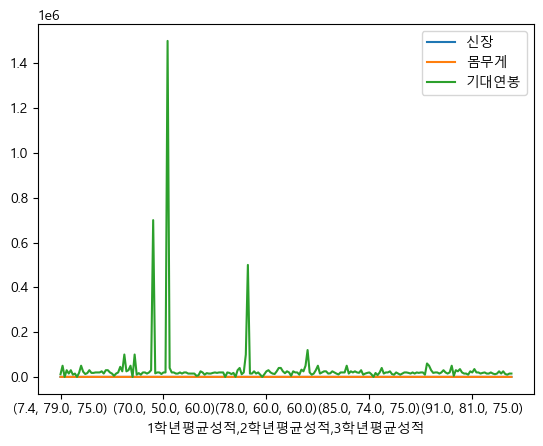

In [15]:
s.groupby(['1학년평균성적','2학년평균성적','3학년평균성적']).mean().plot()

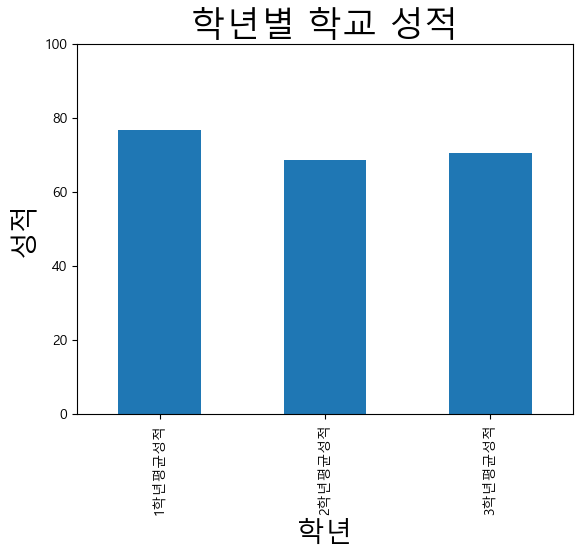

In [16]:
s[['1학년평균성적','2학년평균성적','3학년평균성적']].mean().plot(kind='bar')
plt.title('학년별 학교 성적', fontsize=25)
plt.ylim(0, 100)
plt.xlabel('학년', fontsize=20)
plt.ylabel('성적', fontsize=20)
plt.show()

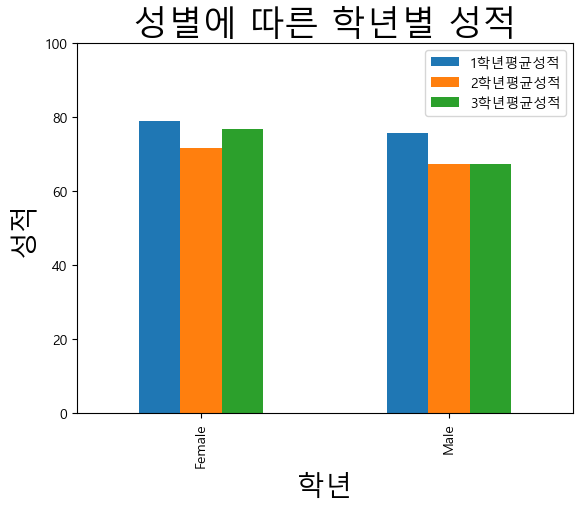

In [17]:
s.groupby('성별')[['1학년평균성적','2학년평균성적','3학년평균성적']].mean().plot(kind='bar')
plt.title('성별에 따른 학년별 성적', fontsize=25)
plt.ylim(0, 100)
plt.xlabel('학년', fontsize=20)
plt.ylabel('성적', fontsize=20)
plt.show()

In [18]:
s.groupby('성별')['전공'].count()

성별
Female     79
Male      156
Name: 전공, dtype: int64

In [19]:
# astype은 데이터타입을 바꾸어준다.
s[['1학년평균성적','2학년평균성적','3학년평균성적']] = s[['1학년평균성적','2학년평균성적','3학년평균성적']].astype('int')
s[['1학년평균성적','2학년평균성적','3학년평균성적']].head(1)

,1학년평균성적,2학년평균성적,3학년평균성적
0,79,65,80


In [20]:
s[['1학년평균성적','2학년평균성적','3학년평균성적']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   1학년평균성적  235 non-null    int32
 1   2학년평균성적  235 non-null    int32
 2   3학년평균성적  235 non-null    int32
dtypes: int32(3)
memory usage: 2.9 KB


In [21]:
y.groupby('학년')

In [22]:
s['성별'].value_counts()

Male      156
Female     79
Name: 성별, dtype: int64

In [23]:
y['성별'].value_counts()

남자    177
여자     88
Name: 성별, dtype: int64

In [24]:
male = s[s['성별'] == 'Male'].sample(n = 79) # random sampling

female = s[s['성별'] == 'Female']

In [25]:
new_df = pd.concat([male,female])
new_df.head(1)

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
209,Male,Commerce,160.0,70.0,84,76,70,Video Games,30 - 60 minute,Anytime,15000,Yes,75%,More than 2 hour,1 - 1.30 hour,나쁨,나쁨,Yes,Yes


Text(9.951937499999994, 0.5, '성적')

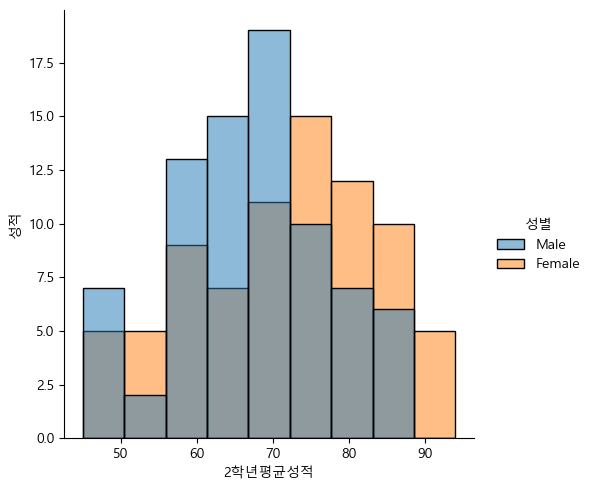

In [26]:
sns.displot(data=new_df, x='2학년평균성적', hue='성별')
plt.ylabel('성적')

In [27]:
new_df = pd.melt(new_df, id_vars=['성별'], value_vars=['1학년평균성적','2학년평균성적','3학년평균성적'])

In [28]:
new_df

,성별,variable,value
0,Male,1학년평균성적,84
1,Male,1학년평균성적,60
2,Male,1학년평균성적,69
3,Male,1학년평균성적,60
4,Male,1학년평균성적,80
...,...,...,...
469,Female,3학년평균성적,90
470,Female,3학년평균성적,70
471,Female,3학년평균성적,70
472,Female,3학년평균성적,75


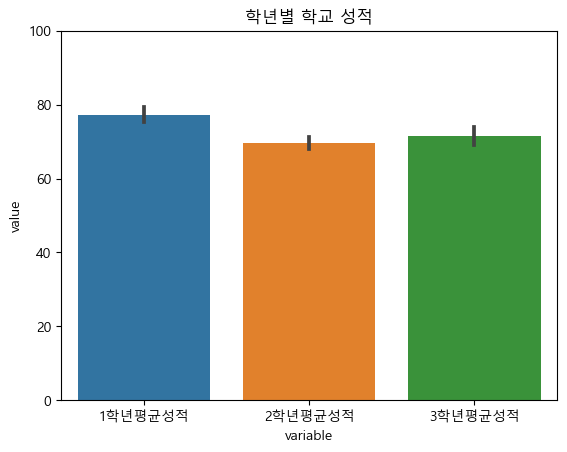

In [29]:
sns.barplot(data=new_df, x='variable', y='value')
plt.title('학년별 학교 성적')
plt.ylim(0,100)
plt.show()

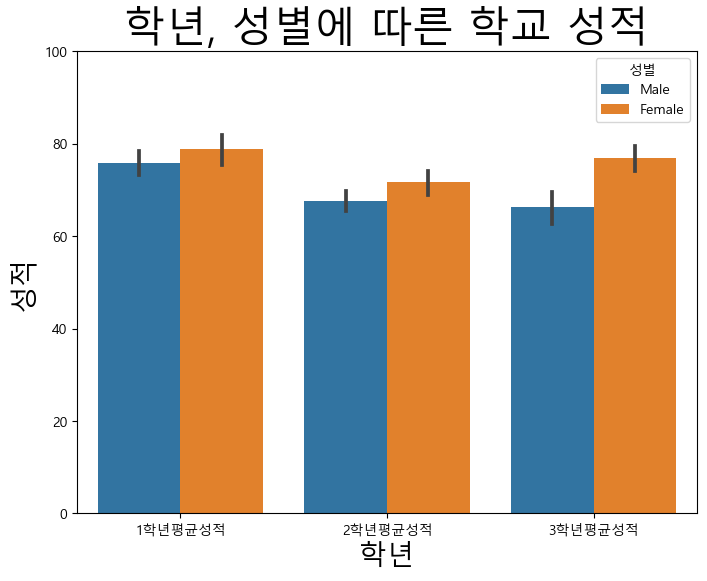

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(data=new_df, x='variable', y='value', hue='성별')
plt.yticks([0,20,40,60,80,100])
plt.title("학년, 성별에 따른 학교 성적", fontsize = 30)
plt.ylabel('성적',fontsize = 20)
plt.xlabel('학년',fontsize = 20)
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

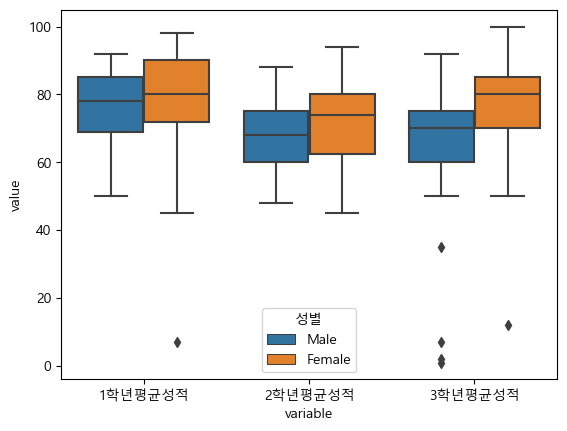

In [36]:
sns.boxplot(data=new_df, x='variable', y='value', hue='성별')
# 들숙날숙한 그래프는 차이가 난다는 의미이다.
# 박스안에 있는 선은 평균을 나타낸다.

<AxesSubplot:>

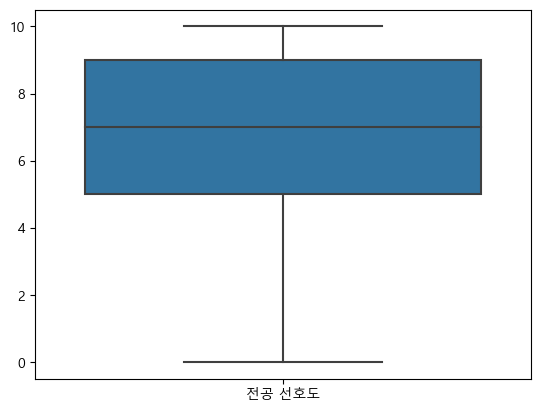

In [39]:
sns.boxplot(data=y)

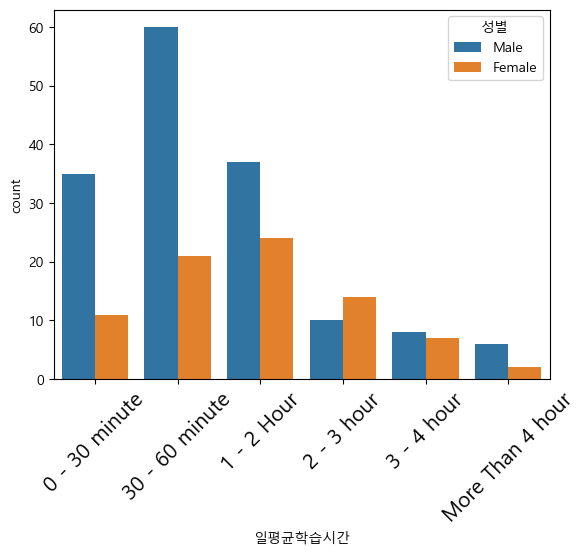

In [48]:
sns.countplot(data=s, x='일평균학습시간', hue='성별')
plt.xticks(rotation=45, fontsize=15)
plt.show()

In [68]:
s.head(1)

,성별,전공,신장,몸무게,1학년평균성적,2학년평균성적,3학년평균성적,취미,일평균학습시간,집중공부시간,기대연봉,전공만족여부,전공관련취업선호도,일평균소셜미디어사용시간,통학시간,학업스트레스,교우관계스트레스,아르바이트여부,방과후수업여부
0,Male,BCA,100.0,58.0,79,65,80,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,나쁨,나쁨,No,No


In [158]:
s.groupby('성별')['일평균학습시간'].value_counts().sort_index()

성별      일평균학습시간         
Female  0 - 30 minute       11
        1 - 2 Hour          24
        2 - 3 hour          14
        3 - 4 hour           7
        30 - 60 minute      21
        More Than 4 hour     2
Male    0 - 30 minute       35
        1 - 2 Hour          37
        2 - 3 hour          10
        3 - 4 hour           8
        30 - 60 minute      60
        More Than 4 hour     6
Name: 일평균학습시간, dtype: int64

In [200]:
m = male['일평균학습시간']
f = female['일평균학습시간']

In [201]:
m = pd.DataFrame(m.value_counts())
m['index'] = m.index
m.index = [x for x in range(0,6)]
print(m)

f = pd.DataFrame(f.value_counts())
f['index'] = f.index
f.index = [x for x in range(0,6)]
print(f)

   일평균학습시간             index
0       35    30 - 60 minute
1       17     0 - 30 minute
2       17        1 - 2 Hour
3        4        3 - 4 hour
4        3  More Than 4 hour
5        3        2 - 3 hour
   일평균학습시간             index
0       24        1 - 2 Hour
1       21    30 - 60 minute
2       14        2 - 3 hour
3       11     0 - 30 minute
4        7        3 - 4 hour
5        2  More Than 4 hour


In [250]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=m['index'], values=m['일평균학습시간']),1,1)
fig.add_trace(go.Pie(labels=f['index'], values=f['일평균학습시간']),1,2)

fig.update_traces(hole=.4, hoverinfo='label+percent')
fig.update_layout(title_text="Male vs Female",
                  
            annotations=[dict(text='Male',x=0.18,y=0.5,font_size=20,showarrow=False),
                         dict(text='Female',x=0.85,y=0.5,font_size=20,showarrow=False)])

fig.show()

# 결론: 복사 붙여넣기를 하면 안된다.